In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from adam_prepare import titanic_pipeline

In [3]:
train, val, test = titanic_pipeline()
train.shape, val.shape, test.shape

((623, 10), (134, 10), (134, 10))

In [4]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,D,Southampton,0
45,0,male,29.0,0,0,8.0500,Third,NaN,Southampton,1
28,1,female,29.0,0,0,7.8792,Third,NaN,Queenstown,1
633,0,male,29.0,0,0,0.0000,First,NaN,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,NaN,Southampton,0


## Does age affect survival?

Null hypothesis: Age does NOT affect survival.

Alternative hypothesis: Age DOES affect survival.

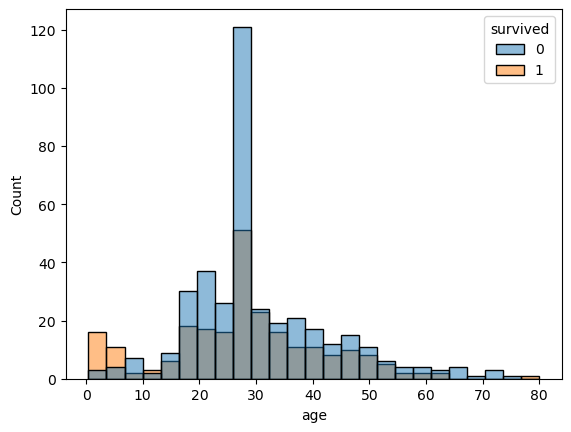

In [5]:
sns.histplot(data = train, x = 'age', hue = 'survived')
plt.show()

Let's run a two-tailed, two-sample (independent) t-test!

In [6]:
train[train.survived == 0].age

748    19.0
45     29.0
633    29.0
403    28.0
695    52.0
       ... 
544    50.0
680    29.0
476    34.0
736    48.0
462    47.0
Name: age, Length: 384, dtype: float64

In [7]:
t_age, p_age = stats.ttest_ind(train[train.survived == 0].age, train[train.survived == 1].age)
t_age, p_age

(2.3909581216339655, 0.017101259242307446)

In [8]:
def eval_p(p, alpha = 0.05):
    
    if p < alpha:
        
        print(f'The result is significant! We reject the null hypothesis with a p-value of {round(p, 2)}.')
        
    else:
        
        print(f'We fail to reject the null hypothesis with a p-value of {round(p, 2)}.')

In [9]:
eval_p(p_age)

The result is significant! We reject the null hypothesis with a p-value of 0.02.


It appears that age does affect the outcome! Looking at the chart, kids age 5 and younger had a great chance to survive the sinking of the Titanic. It looks like at least half the saying "women and children first" came true.

In [10]:
train.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
748,0,male,19.0,1,0,53.1000,First,D,Southampton,0
45,0,male,29.0,0,0,8.0500,Third,NaN,Southampton,1
28,1,female,29.0,0,0,7.8792,Third,NaN,Queenstown,1
633,0,male,29.0,0,0,0.0000,First,NaN,Southampton,1
403,0,male,28.0,1,0,15.8500,Third,NaN,Southampton,0


## Did the sex of the passenger affect their chance of survival?

Null hypothesis: the sex of the passenger has no relation to their chance of survival.

Alternative hypothesis: the sex of the passenger is related to their chance of survival.

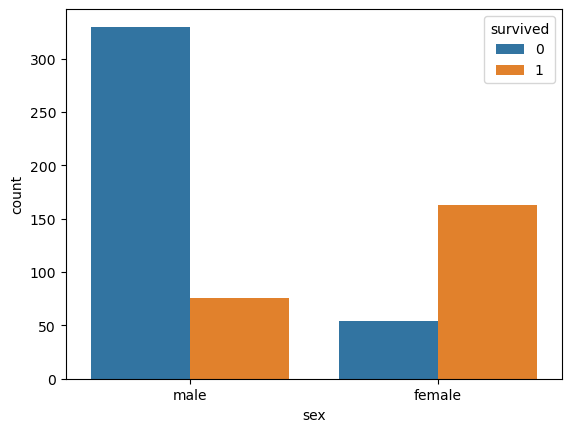

In [11]:
sns.countplot(data = train, x = 'sex', hue = 'survived')
plt.show()

We will run a chi-squared test for group membership.

In [12]:
ss_ct = pd.crosstab(train.sex, train.survived)
ss_ct

survived,0,1
sex,,
female,54,163
male,330,76


In [13]:
chi2, p_ss, degf, exp = stats.chi2_contingency(ss_ct)
eval_p(p_ss)

The result is significant! We reject the null hypothesis with a p-value of 0.0.


We conclude that there is a significant relationship between sex and survival! Looking at our countplot, we see that females had a much higher rate of survival. The other half of "women and children first" was true for the Titanic.

## Exploration summary

- I discovered that age affected survival! Children 5 and younger appeared to survive at higher rates than the rest of the passengers.
- I discovered that sex affected survival! The female passengers survived at a much higher rate than the male passengers. Female passengers had a ~75% survival rate and male passengers had a ~20% survival rate.